GRIPMAY21-TASK-1-Prediction using supervised ML  
Name:PRANOY SANTHOSH M     
Email:tittu12345@outlook.com

IMPORTING LIBRARIES

In [119]:
#importing the required libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

CONNECTING COLAB WITH GOOGLE DRIVE

In [120]:
#connecting google drive with colab to import the .ipynb file
#Data is copied into a csv file and stored in google drive.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


FORMING THE DATAFRAME

In [121]:
#import the dataset from google drive and forming the data frame
df=pd.read_csv('gdrive/My Drive/data/data_task1.csv')
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


PLOTTING THE GIVEN DATA(HOURS STUDIED Vs PERCENTAGE SCORE OBTAINED)

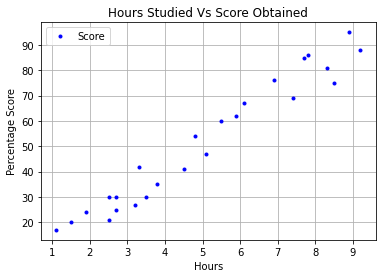

In [122]:
a=df['Hours']
b=df['Scores']
plt.plot(a,b,color='b',linestyle='None',marker='.')
plt.xlabel('Hours')
plt.ylabel('Percentage Score')
plt.legend(['Score'])
plt.title('Hours Studied Vs Score Obtained')
plt.grid()
plt.show()

SPLITTING THE DATA INTO TRAINING AND TESTING PARTS

In [123]:
#Forming training set
x = np.asanyarray(df[['Hours']])
y=np.asanyarray(df[['Scores']])
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=6)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (20, 1) (20, 1)
Test set: (5, 1) (5, 1)


TRAINING THE MODEL

In [124]:
from sklearn import linear_model
reg=linear_model.LinearRegression()
reg.fit(X_train,y_train)
print ('Coefficients: ', reg.coef_)
print ('Intercept: ',reg.intercept_)

Coefficients:  [[10.05312869]]
Intercept:  [1.39232586]


PLOTTING THE REGRESSION LINE AND SCORES VALUES

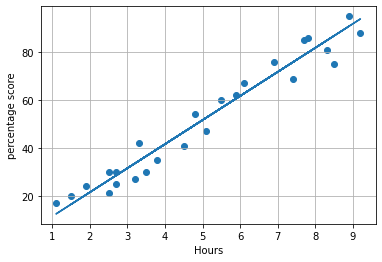

In [125]:
#we derive the regression line in the graph and also plot score points
line = reg.coef_*x+reg.intercept_
plt.scatter(x, y)
plt.plot(x, line)
plt.xlabel('Hours')
plt.ylabel('percentage score')
plt.grid()
plt.show()

PREDICTIONS FROM THE MODEL

In [126]:
yhat = reg.predict(X_test)
yhat

array([[39.59421488],
       [56.68453365],
       [16.47201889],
       [93.8811098 ],
       [84.83329398]])

CROSS CHECKING TEST DATA WITH PREDICTED DATA

In [127]:
#we compare the actual values with the predicted values
dfs=pd.DataFrame(y_test)
dfs
dfs['Predicted']=yhat
dfs.rename(columns={0:'Actual'},inplace=True)
dfs

,Actual,Predicted
0,35,39.594215
1,60,56.684534
2,20,16.472019
3,88,93.881110
4,81,84.833294


PREDICTION USING CUSTOM INPUT

In [128]:
#we give custom input to the model for prediction
cust_hours=[[9.25]]
cust_pred = reg.predict(cust_hours)
print("No of Hours = {}".format(cust_hours))
print("Predicted Score = {}".format(cust_pred))

No of Hours = [[9.25]]
Predicted Score = [[94.38376623]]


ERROR DETECTION


1.ERROR FROM DATA

In [129]:
dfs['Error']=abs(dfs['Predicted']-dfs['Actual'])
dfs 

,Actual,Predicted,Error
0,35,39.594215,4.594215
1,60,56.684534,3.315466
2,20,16.472019,3.527981
3,88,93.881110,5.881110
4,81,84.833294,3.833294


2.CALCULATING MEAN ABSOLUTE ERROR

In [130]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, yhat))

Mean Absolute Error: 4.2304132231404825
